In [1]:
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import pandas as pd
from shapely.geometry import Point
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from pandas import DataFrame, Series
from matplotlib.pyplot import Axes
from osgeo import gdal

In [2]:
# superset of column names
all_cols = {
    'globalid': ['id', 'Unique Site ID'],
    'Site': ['site', 'Site No'],
    'plot': ['plot', 'Plot No'], 
    'Date': ['date', 'Date'], 
    'Name': ['observer', 'Assessor Name'], 
    'Fuel': ['veg_type', 'Vegetation Class'],
    'FireHistor': ['fire_hist', 'Time since Fire (y)'], 
    'latitude': ['lat', 'Latitude (°)'], 
    'longitude': ['lon', 'Longitude (°)'],
    'horaccmete': ['loc_accuracy', 'Location accuracy (m)'],
    'FuelDepth1': ['litter_d_1', 'Litter Depth: Sample 1 (mm)'],
    'Cover1': ['litter_state_1', 'Litter State: Sample 1 (presence/absence)'], 
    'NearSurfac': ['ns_h_1', 'Near surface fuel height: Sample 1 (m)'],
    'NearSurf_1': ['ns_state_1', 'Near surface fuel state: Sample 1 (absent/alive/dead)'],
    'Elevated1': ['elev_h_1', 'Elevated fuel height: Sample 1 (m)'],
    'ElevatedCo': ['elev_state_1', 'Elevated fuel state: Sample 1 (absent/alive/dead)'],
    'CanopyHeig': ['canopy_h_1', 'Canopy height: Sample 1 (m)'],
    'CanopyCove': ['canopy_cov_1', 'Canopy cover: Sample 1 (%)'],
    'FuelDepth2': ['litter_d_2', 'Litter Depth: Sample 2 (mm)'], 
    'Cover2': ['litter_state_2', 'Litter State: Sample 2 (presence/absence)'],
    'NearSurf_2': ['ns_h_2', 'Near surface fuel height: Sample 2 (m)'], 
    'NearSurf_3': ['ns_state_2', 'Near surface fuel state: Sample 2 (absent/alive/dead)'],
    'Elevated2': ['elev_h_2', 'Elevated fuel height: Sample 2 (m)'],
    'Elevated_1': ['elev_state_2', 'Elevated fuel state: Sample 2 (absent/alive/dead)'],
    'FuelDepth3': ['litter_d_3', 'Litter Depth: Sample 3 (mm)'],
    'Cover3': ['litter_state_3', 'Litter State: Sample 3 (presence/absence)'],
    'NearSurf_4': ['ns_h_3', 'Near surface fuel height: Sample 3 (m)'],
    'NearSurf_5': ['ns_state_3', 'Near surface fuel state: Sample 3 (absent/alive/dead)'],
    'Elevated3': ['elev_h_3', 'Elevated fuel height: Sample 3 (m)'],
    'Elevated_2': ['elev_state_3', 'Elevated fuel state: Sample 3 (absent/alive/dead)'],
    'CanopyHe_1': ['canopy_h_3', 'Canopy height: Sample 3 (m)'],
    'CanopyCo_1': ['canopy_cov_3', 'Canopy cover: Sample 3 (%)'],
    'FuelDepth4': ['litter_d_4', 'Litter Depth: Sample 4 (mm)'],
    'Cover4': ['litter_state_4', 'Litter State: Sample 4 (presence/absence)'],
    'NearSurf_6': ['ns_h_4', 'Near surface fuel height: Sample 4 (m)'],
    'NearSurf_7': ['ns_state_4', 'Near surface fuel state: Sample 4 (absent/alive/dead)'],
    'Elevated4': ['elev_h_4', 'Elevated fuel height: Sample 4 (m)'],
    'Elevated_3': ['elev_state_4', 'Elevated fuel state: Sample 4 (absent/alive/dead)'],
    'FuelDepth5': ['litter_d_5', 'Litter Depth: Sample 5 (mm)'],
    'Cover5': ['litter_state_5', 'Litter State: Sample 5 (presence/absence)'],
    'NearSurf_8': ['ns_h_5', 'Near surface fuel height: Sample 5 (m)'],
    'NearSurf_9': ['ns_state_5', 'Near surface fuel state: Sample 5 (absent/alive/dead)'],
    'Elevated5': ['elev_h_5', 'Elevated fuel height: Sample 5 (m)'],
    'Elevated_4': ['elev_state_5', 'Elevated fuel state: Sample 5 (absent/alive/dead)'],
    'CanopyHe_2': ['canopy_h_5', 'Canopy height: Sample 5 (m)'],
    'CanopyCo_2': ['canopy_cov_5', 'Canopy cover: Sample 5 (%)'],
    'FuelDepth6': ['litter_d_6', 'Litter Depth: Sample 6 (mm)'],
    'Cover6': ['litter_state_6', 'Litter State: Sample 6 (presence/absence)'],
    'NearSur_10': ['ns_h_6', 'Near surface fuel height: Sample 6 (m)'],
    'NearSur_11': ['ns_state_6', 'Near surface fuel state: Sample 6 (absent/alive/dead)'],
    'Elevated6': ['elev_h_6', 'Elevated fuel height: Sample 6 (m)'],
    'Elevated_5':['elev_state_6', 'Elevated fuel state: Sample 6 (absent/alive/dead)'],
    'FuelDepth7': ['litter_d_7', 'Litter Depth: Sample 7 (mm)'],
    'Cover7': ['litter_state_7', 'Litter State: Sample 7 (presence/absence)'],
    'NearSur_12': ['ns_h_7', 'Near surface fuel height: Sample 7 (m)'],
    'NearSur_13': ['ns_state_7', 'Near surface fuel state: Sample 7 (absent/alive/dead)'],
    'Elevated7': ['elev_h_7', 'Elevated fuel height: Sample 7 (m)'],
    'Elevated_6': ['elev_state_7', 'Elevated fuel state: Sample 7 (absent/alive/dead)'],
    'CanopyHe_3': ['canopy_h_7', 'Canopy height: Sample 7 (m)'],
    'CanopyCo_3': ['canopy_cov_7', 'Canopy cover: Sample 7 (%)'],
    'FuelDepth8': ['litter_d_8', 'Litter Depth: Sample 8 (mm)'], 
    'Cover8': ['litter_state_8', 'Litter State: Sample 8 (presence/absence)'],
    'NearSur_14': ['ns_h_8', 'Near surface fuel height: Sample 8 (m)'],
    'NearSur_15': ['ns_state_8', 'Near surface fuel state: Sample 8 (absent/alive/dead)'],
    'Elevated8': ['elev_h_8', 'Elevated fuel height: Sample 8 (m)'],
    'Elevated_7': ['elev_state_8', 'Elevated fuel state: Sample 8 (absent/alive/dead)'],
    'FuelDepth9': ['litter_d_9', 'Litter Depth: Sample 9 (mm)'],
    'Cover9': ['litter_state_9', 'Litter State: Sample 9 (presence/absence)'],
    'NearSur_16': ['ns_h_9', 'Near surface fuel height: Sample 9 (m)'],
    'NearSur_17': ['ns_state_9', 'Near surface fuel state: Sample 9 (absent/alive/dead)'],
    'Elevated9': ['elev_h_9', 'Elevated fuel height: Sample 9 (m)'],
    'Elevated_8': ['elev_state_9', 'Elevated fuel state: Sample 9 (absent/alive/dead)'],
    'CanopyHe_4': ['canopy_h_9', 'Canopy height: Sample 9 (m)'],
    'CanopyCo_4': ['canopy_cov_9', 'Canopy cover: Sample 9 (%)'],
    'FuelDept_1': ['litter_d_10', 'Litter Depth: Sample 10 (mm)'],
    'Cover10': ['litter_state_10', 'Litter State: Sample 10 (presence/absence)'],
    'NearSur_18': ['ns_h_10', 'Near surface fuel height: Sample 10 (m)'],
    'NearSur_19': ['ns_state_10', 'Near surface fuel state: Sample 10 (absent/alive/dead)'],
    'Elevated10': ['elev_h_10', 'Elevated fuel height: Sample 10 (m)'],
    'Elevated_9': ['elev_state_10', 'Elevated fuel state: Sample 10 (absent/alive/dead)'],
    'AverageFue': ['litter_d_m', 'Mean litter depth (mm)'],
    'AverageSur': ['litter_state_count', 'Litter cover P/A count (/10)'],
    'AveragePer': ['litter_cov', 'Litter cover (%)'],
    'FuelLoad': ['litter_load', 'Litter fuel load (t/ha)'],
    'Fuel_Hazar': ['s_fhr', 'Surface fuel hazard rating'], 
    'averageNSh': ['ns_h_m', 'Mean near surface height (m)'], 
    'averageNSc': ['ns_state_count', 'Near Surface P/A count (/10)'], 
    'averageN_1': ['ns_cov', 'Near surface cover (%)'], 
    'averageNSd': ['ns_dead_count', 'Near surface dead count'], 
    'percentage': ['ns_dead_%', 'Near surface dead as percentage of near surface present'], 
    'nearsur_20': ['_ns_fhr', 'Near surface Fuel Hazard Rating'], # repeat?
    'Near_Surfa': ['ns_fhr', 'Near surface Fuel Hazard Rating'], 
    'nearsur_21': ['ns_load', 'Near surface fuel load (t/ha)'], 
    'combined': ['s&ns_fhr', 'Combined surface and near surface Fuel Hazard Rating'], 
    'averageele': ['elev_h_m', 'Mean elevated height (m)'], 
    'averagee_1': ['elev_state_count', 'Elevated P/A count (/10)'], 
    'averagee_2': ['elev_cov', 'elevated cover (%)'], 
    'averagee_3': ['elev_dead_count', 'Elevated dead count'],
    'elevatedpe': ['elev_dead_%', 'elevated dead as percentage of elevated present'], 
    'elevated_f': ['_elev_fhr', 'Elevated Fuel Hazard Rating'], # repeat?
    'elevated_h': ['elev_fhr', 'Elevated Fuel Hazard Rating'], 
    'elevate_10': ['elev_load', 'Elevated fuel load (t/ha)'], 
    'bark_type': ['bark_type', 'Bark type'], 
    'bark_fuel': ['bark_haz&type', 'Bark hazard rating and type'], 
    'bark_hazar': ['bark_haz', 'Bark hazard rating'], 
    'bark_fuell': ['bark_load', 'Bark fuel load (t/ha)'], 
    'height_ave': ['canopy_h_m', 'Mean canopy height (m)'], 
    'cannopy_av':['canopy_cov_m', 'Mean canopy cover (%)'], 
    'plotgood': ['representative', 'Plot is representative of area (Y/N)'], 
    'comments': ['comments', 'Comments'],
    'geometry': ['geometry', 'Shapefile geometry'],
}

# column names and descriptions
labels = {
    'afo_cc': 'AFO Crown Cover %',
    'afo_lfd': 'AFO Ladder Fuel Density',
    'afo_ch': 'AFO Canopy Height (m)',
    'afo_cbh': 'AFO Canopy Base Height (m)',
    'afo_litter': 'AFO litter fuel load (t/ha)', 
    'afo_surface': 'AFO surface fuel load (t/ha)', 
    'afo_elevated': 'AFO elevated fuel  load (t/ha)', 
    'afo_bark': 'AFO bark fuel load (t/ha)'
}

#smaller working set of data - extraneous columns removed
subset = [
    'id', 'site', 'plot', 'observer', 'veg_type', 'fire_hist', 'loc_accuracy', 
    'litter_d_m', 'litter_cov', 'litter_load', 's_fhr', 
    'ns_h_m', 'ns_cov', 'ns_load', 'ns_fhr', 
    's&ns_fhr', 
    'elev_h_m', 'elev_cov', 'elev_load', 'elev_fhr', 
    'bark_type', 'bark_load', 'bark_haz', 
    'canopy_h_m', 'canopy_cov_m', 
    'representative', 'comments', 'geometry'
]

afo_keys = [
    'afo_cc', 'afo_lfd', 'afo_ch', 'afo_cbh', 'afo_litter', 
    'afo_surface', 'afo_elevated', 'afo_bark',     
]

field_keys = [
    'litter_d_m', 'litter_cov', 'litter_load', 'ns_h_m', 'ns_cov', #'ns_load', 
    'elev_h_m', 'elev_cov', 'elev_load', 'bark_load', 
    'canopy_h_m', 'canopy_cov_m',
]

In [3]:
# helper functions
def mae(observed: Series, predicted: Series) -> float:
    """mean absolute error."""
    return np.mean(np.abs(observed - predicted))

def rmse(observed: Series, predicted: Series) -> float:
    """root mean squared error"""
    return np.sqrt(np.mean((predicted - observed) ** 2))

def read_afo(paths: dict, coord_df: GeoDataFrame, index: int = None, offset: int = 0) -> Series:
    """samples single and multiband AFO geotiffs

    Args:
        paths (dict): region names and relative path to geotiffs
        coord_df (GeoDataFrame): gdf containing sample coordinates as `geometry`
        index (int, optional): for multiband data the index of the band to sample
        offset (int, optional): generates random offsets to test robustness of data
            sampling to location. Maximum offset in x or y is `offset`

    Returns:
        Series: sampled data
    """

    coord_df = coord_df[['geometry']]
    for loc, path in paths.items():
        with rasterio.open(path, 'r') as src:
            print(f'Input CRS is: {src.crs}')
            coord_df = coord_df.to_crs(src.crs)
            site_coords = [
                (x,y) for x,y in zip(
                    coord_df['geometry'].x - offset, coord_df['geometry'].y
                )
            ]
            coord_df[loc] = -9999
            if index is None:
                coord_df[loc] = [x for x in src.sample(site_coords)]
            else:
                coord_df[loc] = [x[index] for x in src.sample(site_coords)]
    
    return coord_df[paths.keys()].max(axis=1)

def read_rfs(path: str, coord_df: GeoDataFrame) -> Series:
    """reads RFS corporate data in geotiff form

    Args:
        path (str): path to the geotiff file
        coord_df (GeoDataFrame): gdf containing sample coordinates as `geometry`

    Returns:
        Series: sampled data
    """
    coord_df = coord_df[['geometry']]
    with rasterio.open(path, 'r') as src:
        print(f'Input CRS is: {src.crs}')
        coord_df = coord_df.to_crs(src.crs)
        site_coords = [
            (x,y) for x,y in zip(coord_df['geometry'].x, coord_df['geometry'].y)
        ]
        coord_df['sample_data'] = [x[0] for x in src.sample(site_coords)]
    return coord_df['sample_data']

def reg_plot(x: str, y: str, df: DataFrame, hue: str=None, line:bool = True) -> Axes:
    """Regression plot with stats. Points coloured by `hue`

    Args:
        x (str): df column name for x values
        y (str): df column name for y values
        df (DataFrame):
        hue (str): df column name to use to colour the values. Defaults to `None` 
    """
    _df = df[[x, y]].dropna()
    slope, intercept, r_value, p_value, std_err = linregress(_df[x], _df[y])
    _mae = mae(df[x], df[y])
    _rmse = rmse(df[x], df[y])
    stats = f'r sq: {r_value**2:.2f} \n MAE: {_mae:.2f} \n RMSE: {_rmse:.2f}'
    grid = sns.lmplot(x=x, y=y, data=df, hue=hue, fit_reg=False, height=8, aspect=1.5)
    ax = grid.axes[0, 0]
    sns.regplot(x=x, y=y, data=df, scatter=False, ax=ax)
    ax.text(0.1, 0.9, stats, ha='center', va='center', transform=ax.transAxes)
    ax.set(xlabel=labels[x], ylabel=labels[y])
    if line: ax.axline([0, 0], [1, 1], color='grey')
    
    return ax

def reg_plots(x: str, y: str, df: DataFrame, hue: str=None, line:bool = True) -> sns.FacetGrid:
    """creates a series of linear regression with axis labels and calculates
    descriptive statistics.

    Args:
        x (str): df column name for x values
        y (str): df column name for y values
        df (DataFrame):
        hue (str, optional): df column name to define subsets. Defaults to `None`.
    """
    subsets = set(df[hue])
    subsets.discard(None)
    regressions = sns.FacetGrid(df, col=hue, col_order=subsets, hue=hue, height=5, aspect=1.2, col_wrap=2)
    regressions.map(sns.regplot, x, y)
    regressions.set_ylabels(labels[y])
    regressions.set_xlabels(labels[x])
    
    for ax, subset in zip(regressions.axes.flat, subsets):
        _df = df.loc[df[hue]==subset]
        _df = _df[[x, y]].dropna()
        if _df.shape[0] > 5: # make sure _df not too small
            slope, intercept, r_value, p_value, std_err = linregress(_df[x], _df[y], )
            _mae = mae(_df[x], _df[y])
            _rmse = rmse(df[x], df[y])
            stats = f'r sq: {r_value**2:.2f} \n MAE: {_mae:.2f} \n RMSE: {_rmse:.2f}'
            ax.text(0.15, 0.9, stats, ha='center', va='center', transform=ax.transAxes)
            if line: ax.axline([0, 0], [1, 1], color='grey')
    
    return regressions

def rasters_resample(path_dict: dict, res: float) -> dict:
    """resamples geotiffs to resolution = `res`.

    Args:
        path_dict (dict): dictionary containing path to input geotifs.
        res (float): resolution in projected units of resultant geotiff

    Returns:
        dict: dictionary containing path to input geotifs.
    """
    out_paths = {}
    for key, path in path_dict.items():
        outpath = f'{path.split(".")[0]}_{res}.tif'
        gdal.Translate(
            outpath, path,
            options=f'-of GTiff -tr {res} {res} -r bilinear'
        )
        out_paths[key] = outpath 
    return out_paths


read the site and field sampling geodata

In [4]:
path = 'spatial_data/Field_Data/AFO_Field_Samples_20220331.shp'
gdf = gpd.read_file(path)
gdf.shape

(159, 129)

In [5]:
gdf = gdf[gdf['geometry'].x > 0] # drop sites with no location data
gdf.shape

(159, 129)

rename columns to something meaningful (associated with longer description in dictionary)

In [6]:
rename_dict = {} # used to cut down and rename columns
for key, [field, desc] in all_cols.items():
    rename_dict[key] = field
    labels[field] = desc
gdf = gdf.rename(columns=rename_dict)
gdf.shape

(159, 129)

the survey app deals poorly with missing data so recalculate means and percentages

In [7]:
quantitative_fields = ['canopy_cov', 'canopy_h', 'elev_h', 'litter_d', 'ns_h']
presence_absence_fields = ['elev_state', 'litter_state', 'ns_state']

for field in quantitative_fields:
    cols = [string for string in list(gdf.columns.values) if field in string]
    gdf[f'{field}_m'] = gdf[cols[:-1]].mean(axis=1)

for field in presence_absence_fields:
    cols = [string for string in list(gdf.columns.values) if field in string]
    gdf[f'{field}_count'] = (
        gdf[gdf[cols[:-1]] == 'alive'].count(axis=1) + 
        gdf[gdf[cols[:-1]] == 'dead'].count(axis=1) + 
        gdf[gdf[cols[:-1]] == 'yes'].count(axis=1)
    )
    prefix=field.split('_')[0]
    gdf[f'{prefix}_cov'] = gdf[f'{field}_count']*10

gdf.shape

(159, 129)

cut down the number of columns

In [8]:
gdf = gdf[subset]
# sort it just because we can :)
gdf.sort_values(by=['site', 'plot'], inplace=True)
gdf.shape

(159, 28)

shapefile data are imported as objects so need to convert to data types that can be used for correlation and other analyses

In [9]:
gdf= gdf.replace('BlanK', np.nan) # some missing values

numeric = [
    'litter_d_m', 'litter_cov', 'litter_load', 
    'ns_h_m', 'ns_cov', 'ns_load', 
    'elev_h_m', 'elev_cov', 'elev_load', 
    'bark_load', 
    'canopy_h_m', 'canopy_cov_m', 
]

for col in numeric:
    gdf[col] = pd.to_numeric(gdf[col])
gdf.dtypes

id                  object
site                object
plot                object
observer            object
veg_type            object
fire_hist           object
loc_accuracy       float64
litter_d_m         float64
litter_cov           int64
litter_load        float64
s_fhr               object
ns_h_m             float64
ns_cov               int64
ns_load            float64
ns_fhr              object
s&ns_fhr            object
elev_h_m           float64
elev_cov             int64
elev_load            int64
elev_fhr            object
bark_type           object
bark_load            int64
bark_haz            object
canopy_h_m         float64
canopy_cov_m       float64
representative      object
comments            object
geometry          geometry
dtype: object

In [10]:
# add region identifiers
gdf['region'] = np.where(
    gdf['site'].str.startswith('EC'), 'central',
        np.where(gdf['site'].str.startswith('P'), 'pilliga', 
            np.where(gdf['site'].str.startswith('SM'),'snowy', 'central')
    )
)
# gdf.head()
gdf.shape

(159, 29)

## Sample the AFO geotiffs

It seems that all the geotiffs are all projected using the MGA zone 56 crs (EPSG:32756) regardless of what zone they are in but let's check this as we read them.

In [11]:
afo = {} # column names and paths
#crown cover
cc_paths = {
    'pilliga': 'spatial_data/Pilliga-vegetation-canopy_cover-2021.tif',
    'central': 'spatial_data/Centralcoast-vegetation-canopy_cover-2021.tif',
    'snowy': 'spatial_data/Southmnts-vegetation-canopy_cover-2021.tif',
}
afo['afo_cc'] = cc_paths, ['afo_cc'] #second element is list of strata

# ladder fuel density
lfd_paths = {
    'pilliga': 'spatial_data/Pilliga-vegetation-ladder_fuel_density-2021.tif',
    'central': 'spatial_data/Centralcoast-vegetation-ladder_fuel_density-2021.tif',
    'snowy': 'spatial_data/Southmnts-vegetation-ladder_fuel_density-2021.tif',
}
afo['afo_lfd'] = lfd_paths, ['afo_lfd']

# canopy height
ch_paths = {
    'pilliga': 'spatial_data/Pilliga-vegetation-canopy_height-2021.tif',
    'central': 'spatial_data/Centralcoast-vegetation-canopy_height-2021.tif',
    'snowy': 'spatial_data/Southmnts-vegetation-canopy_height-2021.tif',
}
afo['afo_ch'] = ch_paths, ['afo_ch']

# canopy base height
cbh_paths = {
    'pilliga': 'spatial_data/Pilliga-vegetation-canopy_base_height-2021.tif',
    'central': 'spatial_data/Centralcoast-vegetation-canopy_base_height-2021.tif',
    'snowy': 'spatial_data/Southmnts-vegetation-canopy_base_height-2021.tif',
}
afo['afo_cbh'] = cbh_paths, ['afo_cbh']

# fuel loads
fuel_load_paths = {
    'pilliga': 'spatial_data/Pilliga-fuels-classes-2021-density.tif',
    'central': 'spatial_data/Centralcoast-fuels-classes-2021-density.tif',
    'snowy': 'spatial_data/Southmnts-fuels-classes-2021-density.tif',
}
afo['afo_fuel'] = fuel_load_paths, ['afo_litter', 'afo_surface', 'afo_elevated', 'afo_bark']


In [12]:
for layer, val in afo.items():
    path_dict, strata = val
    for band, stratum in enumerate(strata):
        gdf[stratum] = read_afo(path_dict, gdf, index=band)

gdf.head()

Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756


,id,site,plot,observer,veg_type,fire_hist,loc_accuracy,litter_d_m,litter_cov,litter_load,...,geometry,region,afo_cc,afo_lfd,afo_ch,afo_cbh,afo_litter,afo_surface,afo_elevated,afo_bark
16,ccfa3f44-ca62-46fd-bc88-e41f28247cd3,EC10,1,Laurence McCoy,DSF,2,4.658635,19.0,100,5.00,...,POINT (151.28407 -33.58385),central,50.941280,10.934896,5.625101,2.781175,17.716690,17.716690,1.855503,3.123432
25,4d19111d-9db7-4087-9fff-627dbf92f9f4,EC10,2,Laurence McCoy,DSF,2,4.646899,11.0,40,2.50,...,POINT (151.28377 -33.58408),central,53.012089,8.507341,6.257932,3.228979,17.689646,17.689646,1.800139,3.030236
27,9f8027da-efe2-4dbd-a281-9685e01b3fc6,EC10,3,Laurence McCoy,DSF,2,4.675196,11.0,10,1.25,...,POINT (151.28358 -33.58432),central,36.591705,15.579016,3.823408,3.203048,17.148125,17.148125,1.230490,2.071327
33,65096dd3-a842-4875-abf6-755ee5c25a0b,EC11,1,Derek Meaghan,DSF,None,4.666925,31.0,100,15.00,...,POINT (151.04107 -34.16956),central,75.615562,5.986450,8.028476,3.168698,14.341352,16.307968,5.523356,2.643521
34,f4731772-5879-4fa8-b69f-9f0fe8e53adc,EC11,2,Derek Meaghan,DSF,None,4.668194,24.0,80,5.00,...,POINT (151.04137 -34.16933),central,82.196129,3.869198,9.999367,4.333815,14.651359,16.660486,6.413480,3.069542


load the time since fire data

In [13]:
gdf['rfs_tsf'] = read_rfs('spatial_data/RFS/RFS_TSF_202109201.tif',gdf)
labels['rfs_tsf'] = 'RFS Time Since Fire (y) 02109201'
gdf.head()

Input CRS is: EPSG:3308


,id,site,plot,observer,veg_type,fire_hist,loc_accuracy,litter_d_m,litter_cov,litter_load,...,region,afo_cc,afo_lfd,afo_ch,afo_cbh,afo_litter,afo_surface,afo_elevated,afo_bark,rfs_tsf
16,ccfa3f44-ca62-46fd-bc88-e41f28247cd3,EC10,1,Laurence McCoy,DSF,2,4.658635,19.0,100,5.00,...,central,50.941280,10.934896,5.625101,2.781175,17.716690,17.716690,1.855503,3.123432,1
25,4d19111d-9db7-4087-9fff-627dbf92f9f4,EC10,2,Laurence McCoy,DSF,2,4.646899,11.0,40,2.50,...,central,53.012089,8.507341,6.257932,3.228979,17.689646,17.689646,1.800139,3.030236,1
27,9f8027da-efe2-4dbd-a281-9685e01b3fc6,EC10,3,Laurence McCoy,DSF,2,4.675196,11.0,10,1.25,...,central,36.591705,15.579016,3.823408,3.203048,17.148125,17.148125,1.230490,2.071327,1
33,65096dd3-a842-4875-abf6-755ee5c25a0b,EC11,1,Derek Meaghan,DSF,None,4.666925,31.0,100,15.00,...,central,75.615562,5.986450,8.028476,3.168698,14.341352,16.307968,5.523356,2.643521,20
34,f4731772-5879-4fa8-b69f-9f0fe8e53adc,EC11,2,Derek Meaghan,DSF,None,4.668194,24.0,80,5.00,...,central,82.196129,3.869198,9.999367,4.333815,14.651359,16.660486,6.413480,3.069542,4


In [14]:
gdf['afo_cc_off'] = read_afo(cc_paths, gdf, offset=20)
labels['afo_cc_off'] = 'AFO Canopy Cover offset 20 m'

Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756


Correlation matrix

In [15]:
tsf = 0
df = gdf
print(f'n = {df[df["rfs_tsf"] > tsf].shape[0]}')
df[df['rfs_tsf'] > tsf].corr(method='pearson').loc[field_keys, afo_keys].round(2)

n = 159


,afo_cc,afo_lfd,afo_ch,afo_cbh,afo_litter,afo_surface,afo_elevated,afo_bark
litter_d_m,0.31,-0.19,0.49,0.23,0.49,0.51,0.37,0.65
litter_cov,0.05,-0.13,0.27,0.18,0.12,0.14,0.10,0.13
litter_load,0.23,-0.13,0.41,0.19,0.41,0.42,0.30,0.55
ns_h_m,-0.06,0.03,-0.09,-0.14,0.14,0.14,0.11,0.05
ns_cov,-0.18,0.08,0.02,0.07,0.08,0.06,-0.14,-0.04
elev_h_m,0.15,0.18,0.09,-0.04,0.22,0.25,0.30,0.29
elev_cov,0.11,0.23,0.06,-0.07,0.13,0.16,0.21,0.23
elev_load,0.06,0.25,0.00,-0.18,0.00,0.02,0.19,0.09
bark_load,-0.00,-0.04,0.40,0.17,0.07,0.07,-0.04,0.20
canopy_h_m,-0.34,-0.12,0.20,0.49,-0.02,-0.07,-0.43,-0.04


Plot the 'interesting' relationships

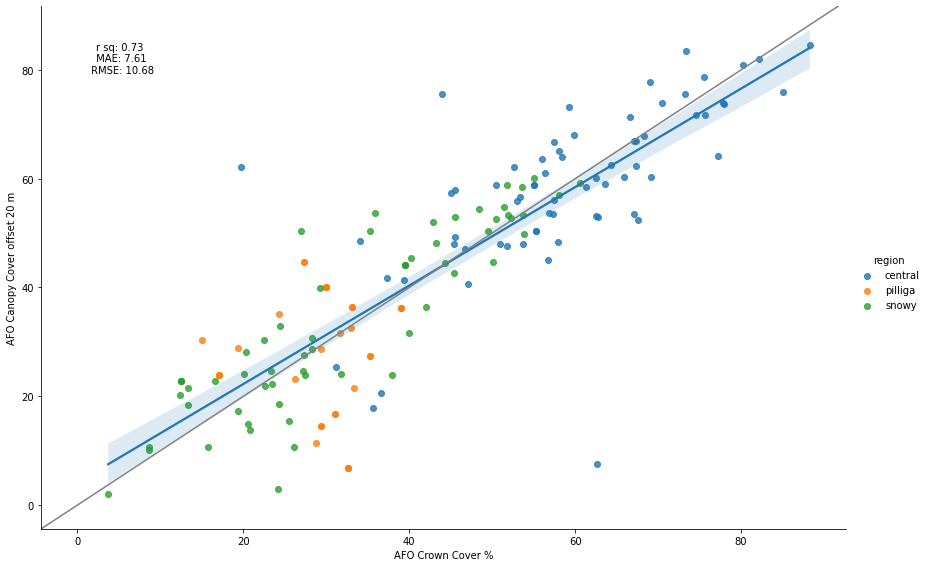

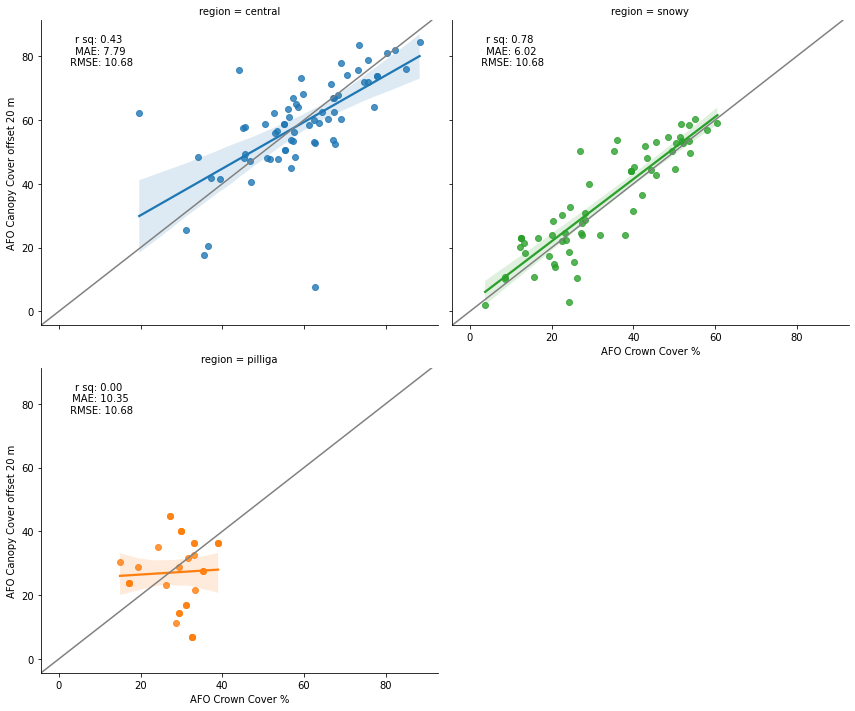

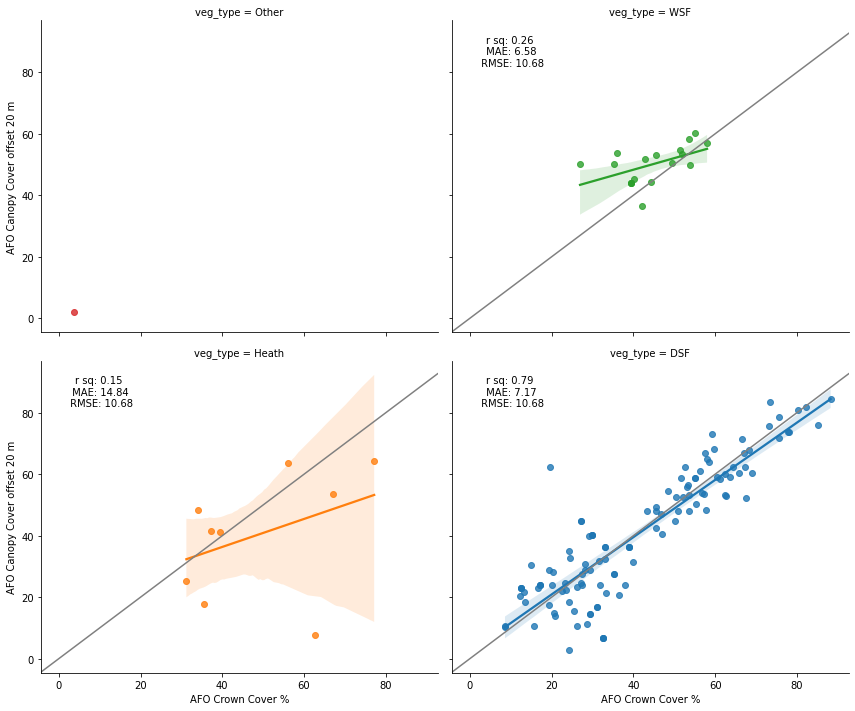

In [44]:
x = 'afo_cc'
y = 'afo_cc_off'
df = gdf
line=True
reg_plot(x, y, df, hue='region', line=line)
plt.show()
reg_plots(x, y, df, hue='region', line=line)
plt.show()
reg_plots(x, y, df, hue='veg_type', line=line)
plt.show()

resample to 30m

In [16]:
res = 30
afo_30m = {}
for layer, val in afo.items():
    path_dict = val[0]
    afo_30m[layer] = rasters_resample(path_dict, res), val[1]
afo_30m

{'afo_cc': ({'pilliga': 'spatial_data/Pilliga-vegetation-canopy_cover-2021_30.tif',
   'central': 'spatial_data/Centralcoast-vegetation-canopy_cover-2021_30.tif',
   'snowy': 'spatial_data/Southmnts-vegetation-canopy_cover-2021_30.tif'},
  ['afo_cc']),
 'afo_lfd': ({'pilliga': 'spatial_data/Pilliga-vegetation-ladder_fuel_density-2021_30.tif',
   'central': 'spatial_data/Centralcoast-vegetation-ladder_fuel_density-2021_30.tif',
   'snowy': 'spatial_data/Southmnts-vegetation-ladder_fuel_density-2021_30.tif'},
  ['afo_lfd']),
 'afo_ch': ({'pilliga': 'spatial_data/Pilliga-vegetation-canopy_height-2021_30.tif',
   'central': 'spatial_data/Centralcoast-vegetation-canopy_height-2021_30.tif',
   'snowy': 'spatial_data/Southmnts-vegetation-canopy_height-2021_30.tif'},
  ['afo_ch']),
 'afo_cbh': ({'pilliga': 'spatial_data/Pilliga-vegetation-canopy_base_height-2021_30.tif',
   'central': 'spatial_data/Centralcoast-vegetation-canopy_base_height-2021_30.tif',
   'snowy': 'spatial_data/Southmnts-veg

In [46]:
gdf_30 = gdf.copy(deep=True)
for layer, val in afo_30m.items():
    path_dict, strata = val
    for band, stratum in enumerate(strata):
        gdf_30[stratum] = read_afo(path_dict, gdf_30, index=band)

gdf_30.shape

Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756
Input CRS is: EPSG:32756


(159, 39)

Mean for each site

In [47]:
gdf_site = gdf.groupby('site').mean()
# add region identifiers
gdf_site['site'] = gdf_site.index
gdf_site['region'] = np.where(
    gdf_site['site'].str.startswith('EC'), 'central',
        np.where(gdf_site['site'].str.startswith('P'), 'pilliga', 
            np.where(gdf_site['site'].str.startswith('SM'),'snowy', 'other')
    )
)
gdf_site.shape

(53, 25)

In [56]:
gdf[gdf['region'] == 'snowy'].shape

(61, 39)